In [47]:
import numpy as np
from utilities import visualize_result, show, get_test_data
import matplotlib.pyplot as plt
from HopfieldNetwork import HopfieldNetwork, LearningRule, Mode
from data_manager import *

In [118]:
def plot_results(images, noised_images, results_hebb, results_oja, m, height, width, fig_height, fig_width, cmap_type='gray'):
    fig, axes = plt.subplots(m, 4, figsize=(fig_width, fig_height)) 
    fig.patch.set_facecolor('white')
    fig.tight_layout()

    for i in range(0, m):
        
        axes[i, 0].imshow(images[i].reshape(height, width), cmap=cmap_type)
        axes[i, 1].imshow(noised_images[i].reshape(height, width), cmap=cmap_type)
        axes[i, 2].imshow(results_hebb[i].reshape(height, width), cmap=cmap_type)
        axes[i, 3].imshow(results_oja[i].reshape(height, width), cmap=cmap_type)
        
        for ax_i in axes:
            for ax_j in ax_i:
                ax_j.set_xticks([])
                ax_j.set_yticks([])
                ax_j.patch.set_edgecolor('black') 
                ax_j.patch.set_linewidth('3')

In [150]:
def get_images(data, sample_count_m, neurons_count_n, p):
    random_seed = 123
    random_generator = np.random.default_rng(seed=random_seed)
    noise_percentage = p
    noise_changes_count = int(noise_percentage * neurons_count_n)
    
    network = HopfieldNetwork(LearningRule.Hebb, Mode.Synchronous, data, sample_count_m, neurons_count_n, random_seed)
    T_Hebb = network.get_weights()

    network.set_learning_rule(LearningRule.Oja)
    T_Oja = network.get_weights(0.001, 100)

    images = []
    noised_images = []
    results_hebb = []
    results_oja = []

    for i in range(0, sample_count_m):
        sample_id = i

        sample = np.reshape(data[:, sample_id], (neurons_count_n, 1))
        images.append(sample)

        sample_test = get_test_data(np.copy(sample), noise_changes_count, random_generator)
        noised_images.append(sample_test)

        result_synchronous_hebb = network.recognize(T_Hebb, np.copy(sample_test), 10000)
        results_hebb.append(result_synchronous_hebb)

        result_synchronous_oja = network.recognize(T_Oja, np.copy(sample_test), 10000)
        results_oja.append(result_synchronous_oja)
    
    return images, noised_images, results_hebb, results_oja, sample_count_m

Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 4 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 4 iter
Model convergence at 3 iter


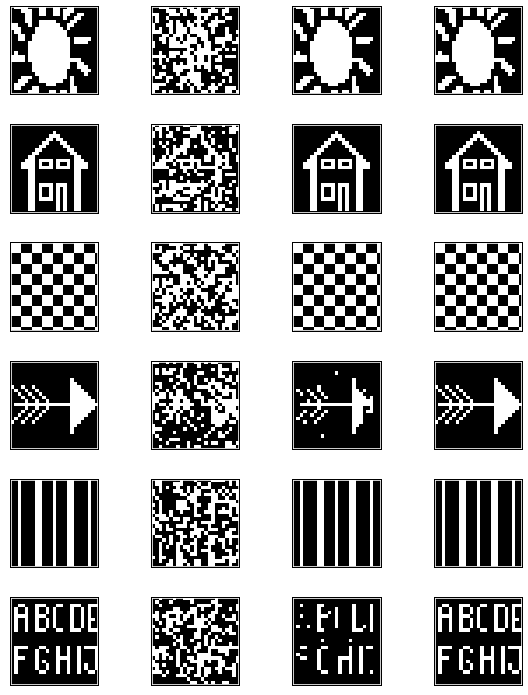

In [108]:
data, sample_count_m, neurons_count_n, height, width = get_set_large_25x25()

get_images(data, sample_count_m, neurons_count_n, height, width, 0.30, 10, 8)

In [189]:
data, sample_count_m, neurons_count_n, height, width = get_set_small_7x7()
images, noised_images, results_hebb, results_oja, sample_count_m = get_images(data, sample_count_m, neurons_count_n, 0.30)

Model convergence at 4 iter
Model convergence at 3 iter
Model convergence at 4 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 4 iter
Model convergence at 5 iter
Model convergence at 6 iter
Model convergence at 6 iter


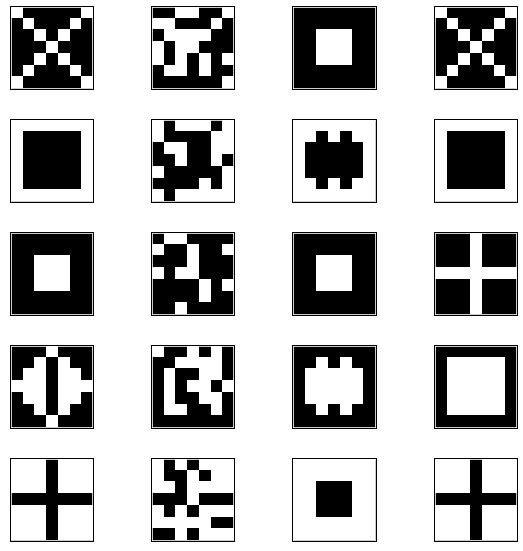

In [192]:
plot_results(images, noised_images, results_hebb, results_oja, sample_count_m, height, width, 8, 8)

Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter


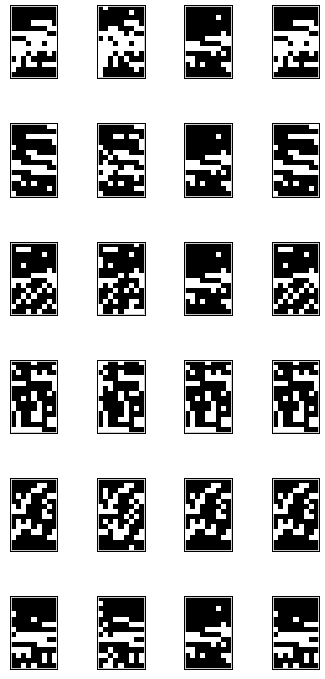

In [113]:
data, sample_count_m, neurons_count_n, height, width = get_set_animals_14x9()
get_images(data, sample_count_m, neurons_count_n, height, width, 0.10, 10, 5)

In [124]:
data, sample_count_m, neurons_count_n, height, width = get_set_letters_14x20()
images, noised_images, results_hebb, results_oja, sample_count_m = get_images(data, sample_count_m, neurons_count_n, 0.10)

D:\Studia\Magisterka\mgr_sem2\sieci_neuronowe\projekt2\hopfieldNetwork\HopfieldNetwork\HopfieldNetwork\HopfieldNetwork.py:50: RuntimeWarning: overflow encountered in matmul
  t += nu * np.outer(y, (x - np.matmul(y, t)))
D:\Studia\Magisterka\mgr_sem2\sieci_neuronowe\projekt2\hopfieldNetwork\HopfieldNetwork\HopfieldNetwork\HopfieldNetwork.py:49: RuntimeWarning: invalid value encountered in matmul
  y = np.matmul(x, t)


Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter
Model convergence at 8 iter
Model convergence at 3 iter
Model convergence at 4 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter
Model convergence at 4 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 4 iter
Model convergence at

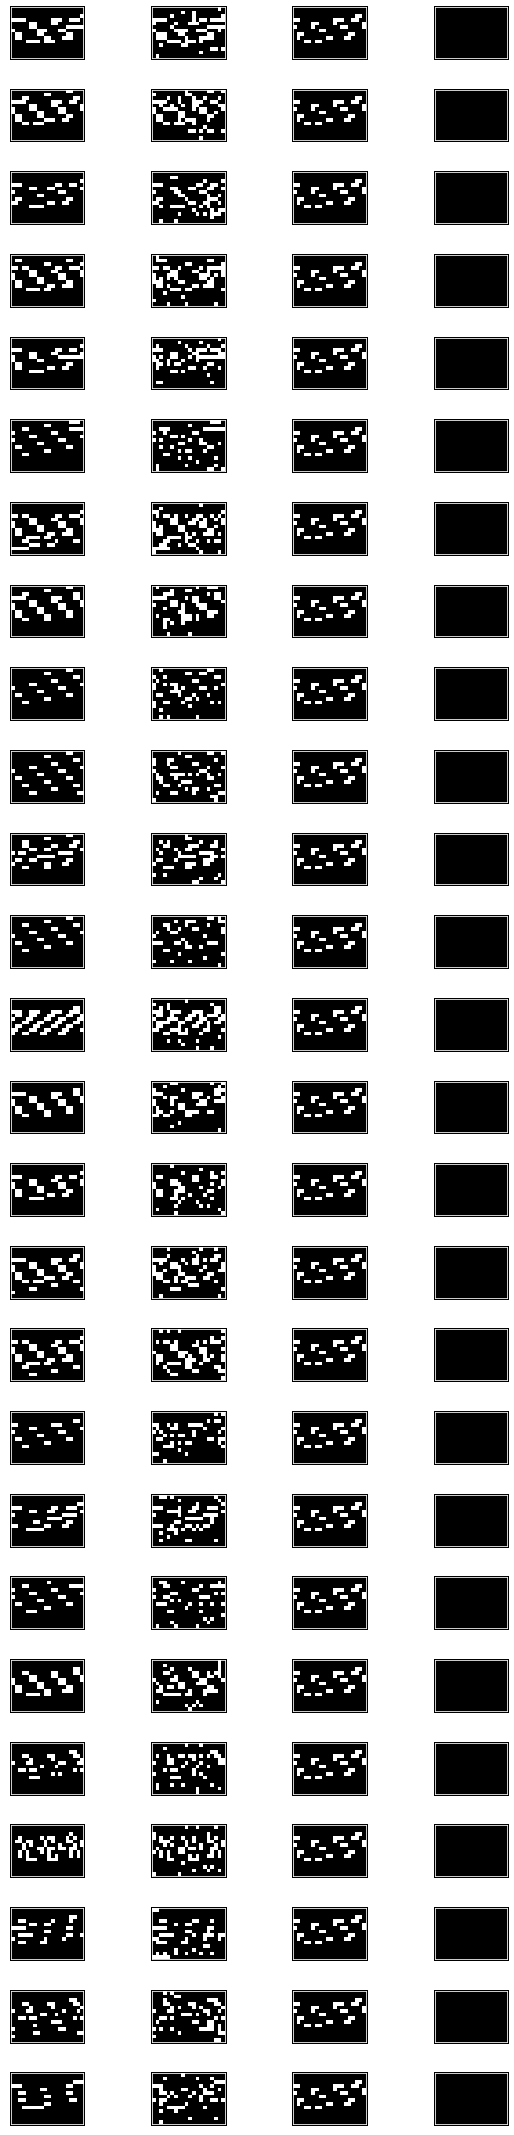

In [125]:
plot_results(images, noised_images, results_hebb, results_oja, sample_count_m, height, width, 30, 8)

In [129]:
data, sample_count_m, neurons_count_n, height, width = get_set_letters_abc_8x12()
images, noised_images, results_hebb, results_oja, sample_count_m = get_images(data, sample_count_m, neurons_count_n, 0.30)

Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter


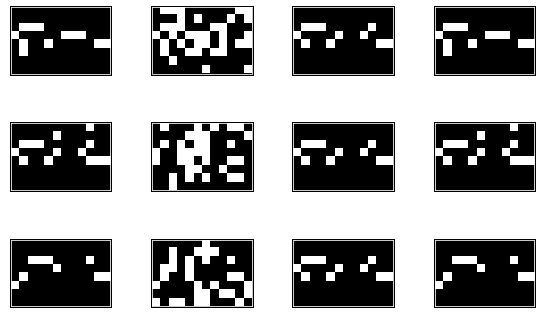

In [130]:
plot_results(images, noised_images, results_hebb, results_oja, sample_count_m, height, width, 5, 8)

In [131]:
data, sample_count_m, neurons_count_n, height, width = get_set_OCRA_12x30()
images, noised_images, results_hebb, results_oja, sample_count_m = get_images(data, sample_count_m, neurons_count_n, 0.10)

Model convergence at 12 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter
Model convergence at 4 iter
Model convergence at 3 iter
Model convergence at 8 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 8 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter


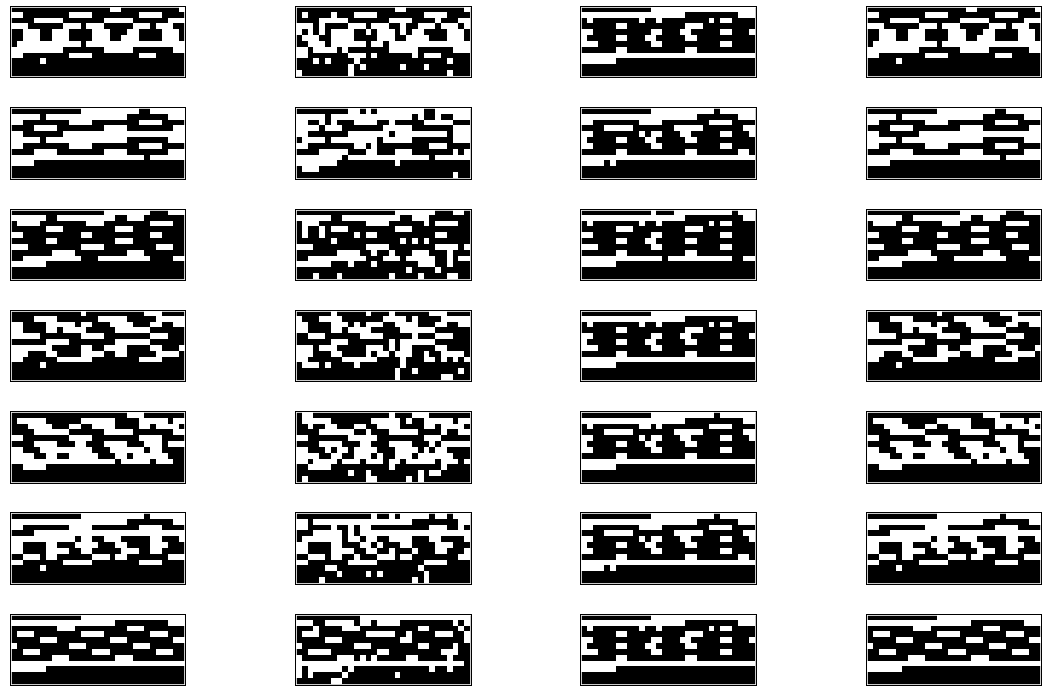

In [133]:
plot_results(images, noised_images, results_hebb, results_oja, sample_count_m, height, width, 10, 16)

In [147]:
data, sample_count_m, neurons_count_n, height, width = get_set_large_25x50()
images, noised_images, results_hebb, results_oja, sample_count_m = get_images(data, sample_count_m, neurons_count_n, 0.10)

Model convergence at 4 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter


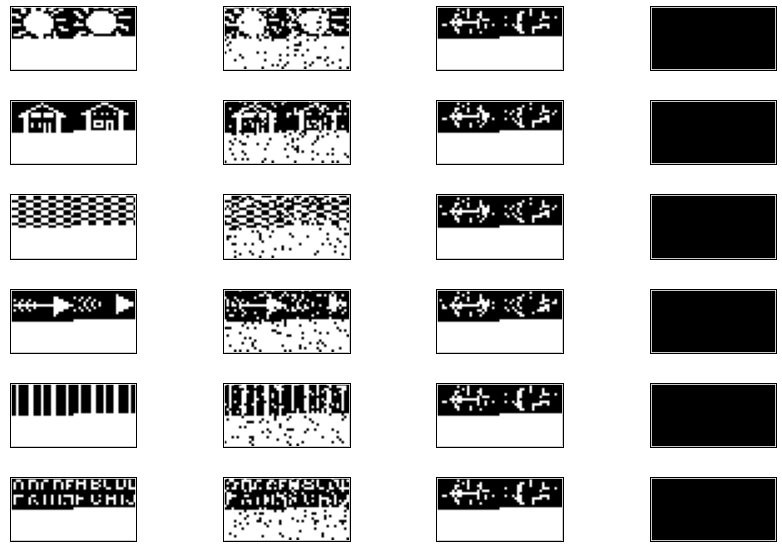

In [148]:
plot_results(images, noised_images, results_hebb, results_oja, sample_count_m, height, width, 8, 12)

In [164]:
data, sample_count_m, neurons_count_n, height, width = get_set_large_25x25_plus()
images, noised_images, results_hebb, results_oja, sample_count_m = get_images(data, sample_count_m, neurons_count_n, 0.10)

Model convergence at 9 iter
Iter exceeded
Model convergence at 5 iter
Iter exceeded
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 5 iter
Iter exceeded
Model convergence at 7 iter
Iter exceeded
Model convergence at 6 iter
Iter exceeded
Model convergence at 5 iter
Iter exceeded
Model convergence at 5 iter
Iter exceeded
Model convergence at 6 iter
Iter exceeded
Model convergence at 9 iter
Iter exceeded
Model convergence at 7 iter
Iter exceeded
Model convergence at 6 iter
Iter exceeded
Model convergence at 5 iter
Iter exceeded
Model convergence at 8 iter
Iter exceeded
Model convergence at 7 iter
Iter exceeded


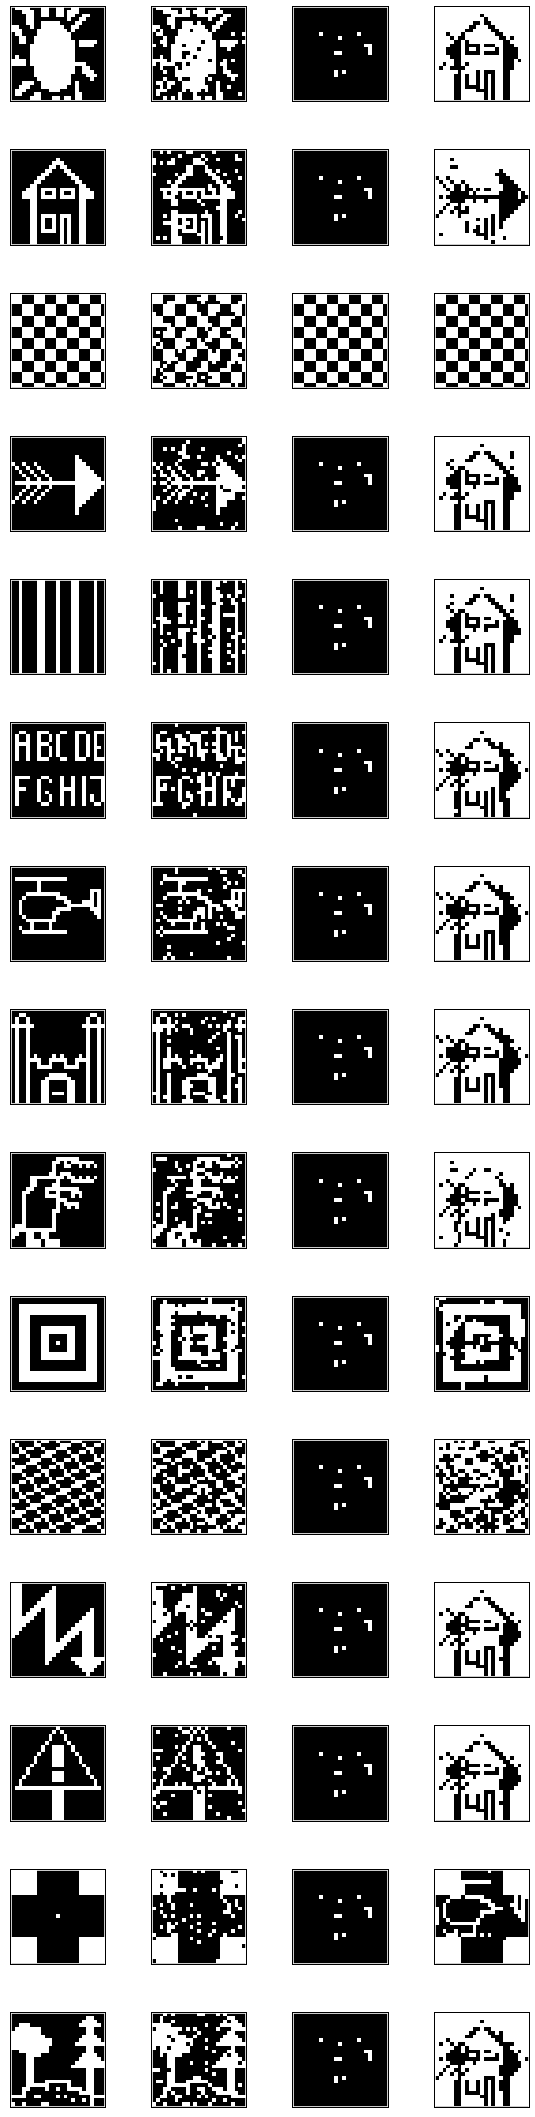

In [165]:
plot_results(images, noised_images, results_hebb, results_oja, sample_count_m, height, width, 30, 8)

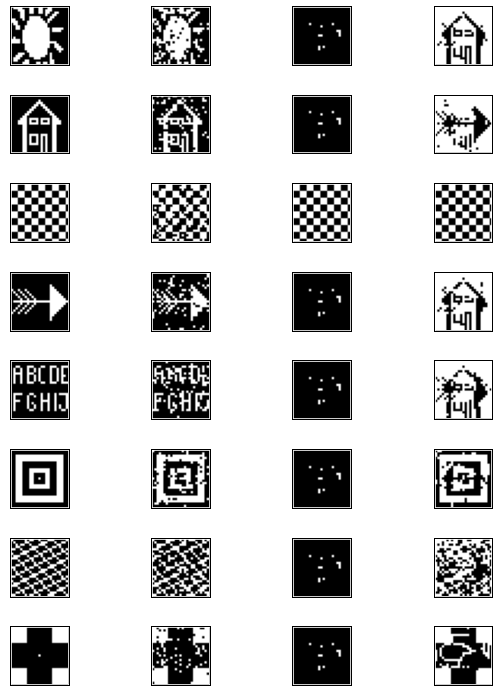

In [166]:
subset = [0, 1, 2, 3, 5, 9, 10, 13]
images_sub = [images[i] for i in subset]
noised_images_sub = [noised_images[i] for i in subset]
results_hebb_sub = [results_hebb[i] for i in subset]
results_oja_sub = [results_oja[i] for i in subset]

plot_results(images_sub, noised_images_sub, results_hebb_sub, results_oja_sub, len(subset), height, width, 10, 8)

In [162]:
data, sample_count_m, neurons_count_n, height, width = get_set_large_25x25_plus()
data, sample_count_m = delete_from_set(data, [2])
images, noised_images, results_hebb, results_oja, sample_count_m = get_images(data, sample_count_m, neurons_count_n, 0.10)

Model convergence at 10 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter
Model convergence at 6 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 9 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter
Model convergence at 7 iter
Model convergence at 3 iter


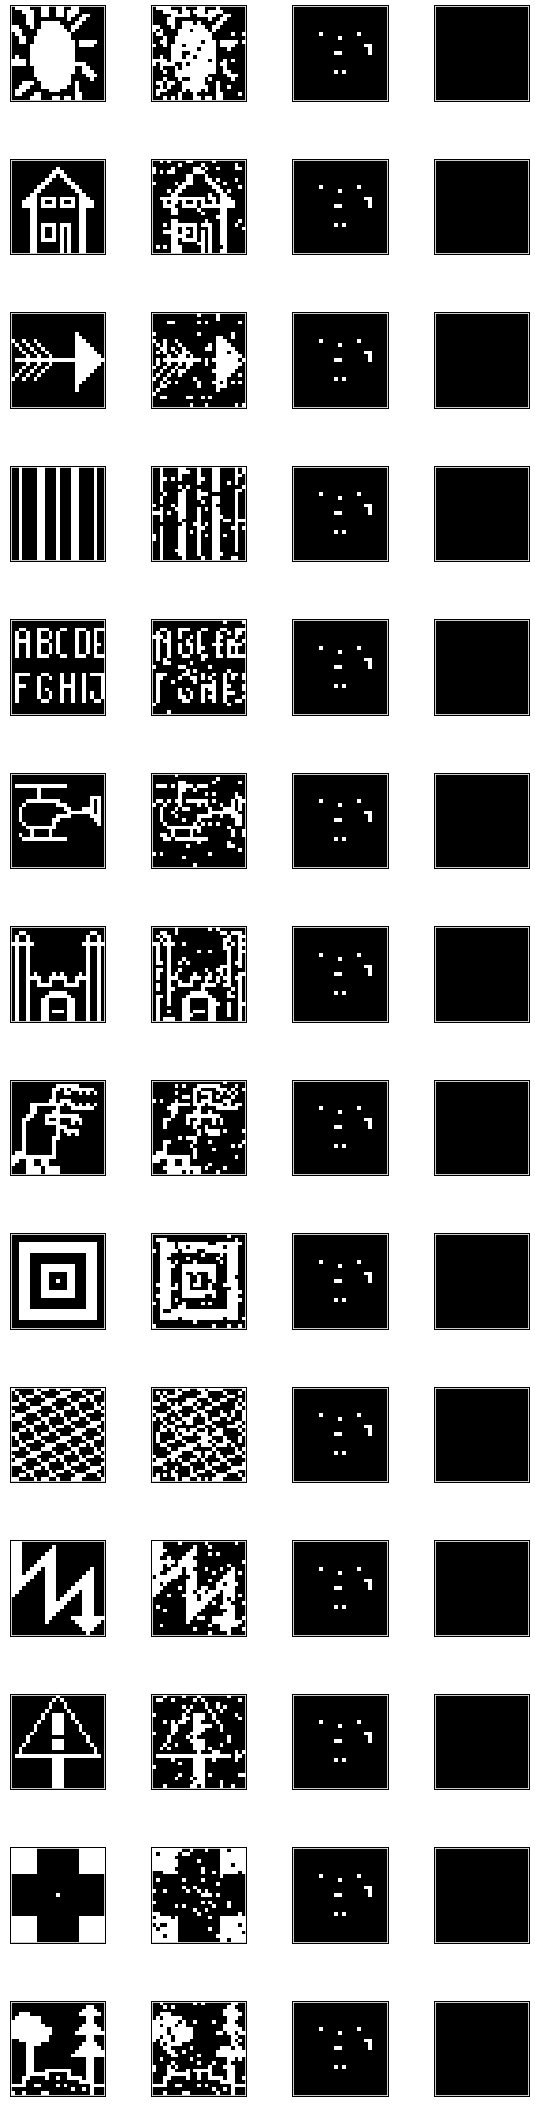

In [163]:
plot_results(images, noised_images, results_hebb, results_oja, sample_count_m, height, width, 30, 8)

In [184]:
data, sample_count_m, neurons_count_n, height, width = get_set_large_25x50()
height = 12
neurons_count_n = height*width
cut_data = data[0:neurons_count_n]

images, noised_images, results_hebb, results_oja, sample_count_m = get_images(cut_data, sample_count_m, neurons_count_n, 0.3)

Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 4 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 3 iter
Model convergence at 5 iter
Model convergence at 3 iter


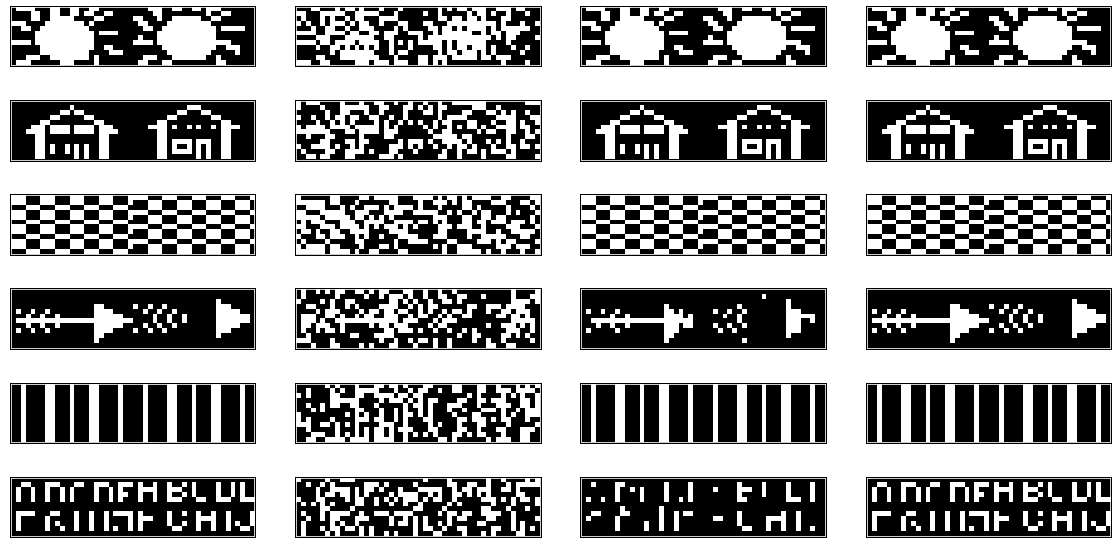

In [185]:
plot_results(images, noised_images, results_hebb, results_oja, sample_count_m, height, width, 8, 16)